# 판매 분석

In [17]:
!pip install pymysql > /dev/null
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시시작

In [1]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving mysql.json to mysql.json


In [2]:
import json
with open(filename) as fp:
    config_str = fp.read()
config = json.loads(config_str)

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [4]:
import db_module_new as dm

In [6]:
!ls -la

total 32
drwxr-xr-x 1 root root 4096 Aug 26 07:53 .
drwxr-xr-x 1 root root 4096 Aug 26 06:24 ..
drwxr-xr-x 4 root root 4096 Aug 13 13:34 .config
-rw-r--r-- 1 root root 2023 Aug 26 07:53 db_module_new.py
drwxr-xr-x 2 root root 4096 Aug 26 06:40 .ipynb_checkpoints
-rw-r--r-- 1 root root  124 Aug 26 07:52 mysql.json
drwxr-xr-x 2 root root 4096 Aug 26 07:53 __pycache__
drwxr-xr-x 1 root root 4096 Aug 13 13:35 sample_data


## 1. 월별 매출/이익

In [7]:
results = dm.get_monthly_data(config)
df = pd.DataFrame(results, columns=['월', '매출', '이익'])
df.set_index('월', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)

tdf = df.T
tdf

월,01,02,03,04,05,06,07,08,09,10,11,12
매출,5838100,7531400,4483100,7269500,5745000,4429800,5525800,5244400,4195200,4619000,7698300,4974200
이익,349930,749890,357360,648730,380030,441750,387600,560530,287600,392440,665480,289870


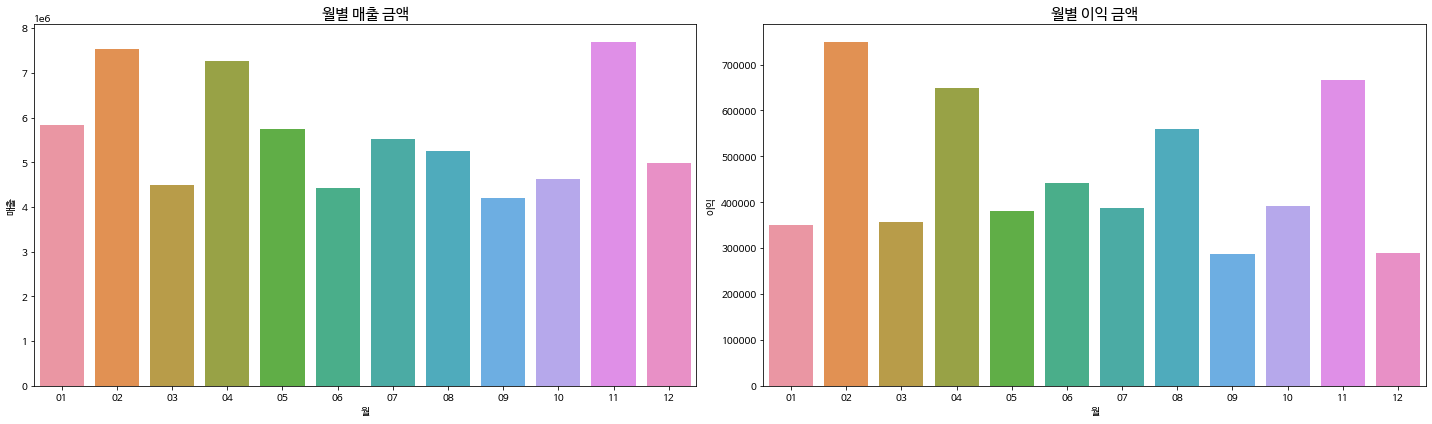

In [8]:
fig, ax = plt.subplots(1,2, figsize=(20, 6))
sns.barplot(x=df.index, y='매출', data=df, ax=ax[0])
sns.barplot(x=df.index, y='이익', data=df, ax=ax[1])
ax[0].set_title('월별 매출 금액', fontsize=15)
ax[1].set_title('월별 이익 금액', fontsize=15)
plt.tight_layout()
plt.show()

## 거래처별 매출 이익

In [9]:
results = dm.get_company_data(config)
df = pd.DataFrame(results)
df.set_index(0, inplace=True)
df.columns = ['매출', '이익']
df.index.name = '거래처'
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 멀티캠퍼스 to 테크브루
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   매출      5 non-null      int64
 1   이익      5 non-null      int64
dtypes: int64(2)
memory usage: 120.0+ bytes


,매출,이익
거래처,,
멀티캠퍼스,9010700,659770
생산성본부,11421500,879660
표준협회,14894100,1188120
한경아카데미,15614900,1490210
테크브루,16612600,1293450


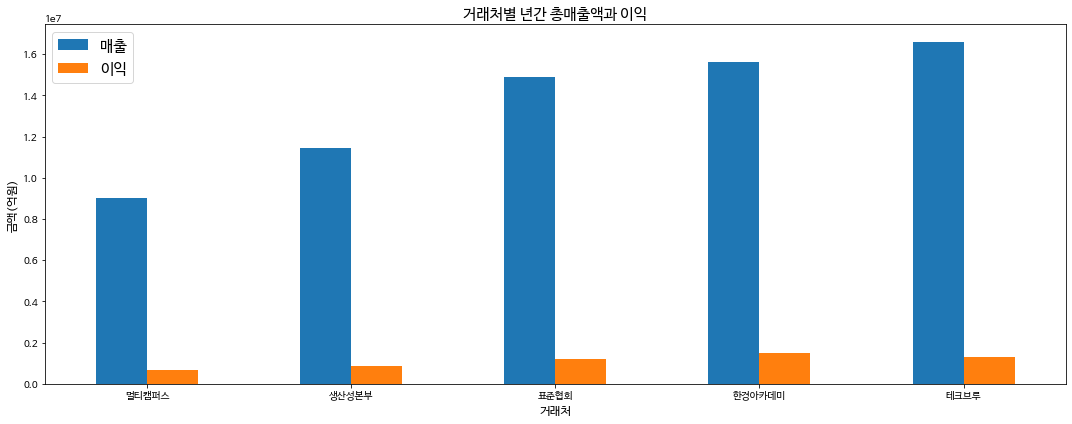

In [10]:
df.plot.bar(figsize=(15,6))
plt.xticks(rotation=0)
plt.title('거래처별 년간 총매출액과 이익', fontsize=15)
plt.xlabel('거래처', size=12)
plt.ylabel('금액(억원)', size=12)
plt.legend(loc='upper left', fontsize=15)
plt.tight_layout()
plt.show()

## 거래처별 판매제품 및 수량

In [11]:
results = dm.get_names_units_company(config)
df = pd.DataFrame(results)
df.set_index(0, inplace=True)
df.index.name = '거래처'
df.columns = ['제품명', '판매수량']
df.head()

,제품명,판매수량
거래처,,
멀티캠퍼스,거꾸리,28
멀티캠퍼스,러닝머신,20
멀티캠퍼스,로잉머신,20
멀티캠퍼스,매트,24
멀티캠퍼스,보조배터리,5


## 제품별 판매수량/매출/이익

In [8]:
results = dm.get_product_data(config)
df = pd.DataFrame(results)
df.set_index(0, inplace=True)
df.columns = ['수량','매출','이익']
df.index.name = '제품명'
df.head()

,수량,매출,이익
제품명,,,
거꾸리,73,2182700,65700
내비게이션,58,2581000,128760
랜턴,68,6432800,321640
러닝머신,35,1361500,177100
로잉머신,37,2571500,128760


In [9]:
results = dm.get_category_data(config)
df = pd.DataFrame(results)
df.set_index(0, inplace=True)
df.columns = ['매출', '이익']
df.head()

,매출,이익
0,,
자동차용품,19830700,1241490
캠핑용품,29251400,2512310
헬스용품,18471700,1757410
